# 1. Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?



**Sequence-to-sequence RNN:** This type of model is often used for tasks that involve transforming one sequence of data into another sequence of data, such as:

Machine translation: where a sequence of words in one language is translated to a sequence of words in another language.
Text summarization: where a long sequence of text is condensed into a shorter sequence of text.
Speech recognition: where a sequence of audio signals is transcribed into a sequence of text.
Video captioning: where a sequence of video frames is described with a sequence of words.

    
**Sequence-to-vector RNN:** This type of model is often used for tasks that involve predicting a single output value or classification label from a sequence of input data, such as:

Sentiment analysis: where a sequence of words in a sentence is classified as positive or negative.
Named entity recognition: where a sequence of text is labeled with named entities such as people, organizations, or locations.
Time series forecasting: where a sequence of past values is used to predict a single future value.


**Vector-to-sequence RNN:** This type of model is often used for tasks that involve generating a sequence of output data from a fixed-length input vector, such as:

Image captioning: where an image is encoded into a fixed-length vector and then decoded into a sequence of words.
Music generation: where a fixed-length vector representing musical features is used to generate a sequence of notes or chords.
Text generation: where a fixed-length vector representing a latent space is used to generate a sequence of words or characters.
Of course, these are just a few examples, and there are many other applications and variations of RNN models depending on the specific task and the nature of the input and output data.







# 2. How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?


The inputs to an RNN layer must have at least 3 dimensions: batch size, time steps, and input features. The dimensions represent the following:

Batch size: the number of examples in a batch.
Time steps: the number of time steps in the sequence.
Input features: the number of features at each time step.
For example, if we have a batch of 32 sequences, each sequence consisting of 10 time steps with 64-dimensional input vectors, the input tensor to the RNN layer would have shape (32, 10, 64).

The output of an RNN layer also has at least 3 dimensions, with the same batch size and time steps dimensions as the input, but the number of output features may be different depending on the configuration of the RNN layer. For example, if we use a simple RNN layer with 32 hidden units, the output tensor would have shape (32, 10, 32).

It's worth noting that some RNN layers in Keras can be configured to return only the output at the final time step, in which case the output tensor would have shape (batch_size, num_units) rather than (batch_size, time_steps, num_units). This is useful for tasks where we only need to make a prediction based on the entire sequence, rather than at each time step.

# 3. If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?


In a deep sequence-to-sequence RNN, you should set return_sequences=True for all RNN layers except the last one. The last RNN layer should have return_sequences=False in order to produce a single output vector for the entire sequence. This is because each RNN layer processes the output of the previous layer, and we want to feed the entire output sequence of the previous layer to the next layer.

For example, if we have a deep RNN model with 3 layers, we would set return_sequences=True for the first two layers, and return_sequences=False for the last layer:



In [1]:
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(None, input_dim)),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(32),
    Dense(output_dim, activation='softmax')
])


NameError: name 'Sequential' is not defined

In a sequence-to-vector RNN, you should set return_sequences=False for all RNN layers, since we want the final output vector to represent the entire sequence. This is similar to the last layer of a deep sequence-to-sequence RNN.

For example, if we have a sequence-to-vector RNN with a single layer, we would set return_sequences=False:



In [ ]:
model = Sequential([
    SimpleRNN(64, return_sequences=False, input_shape=(None, input_dim)),
    Dense(output_dim, activation='softmax')
])

# 4. Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?


For forecasting the next seven days of a daily univariate time series, a suitable RNN architecture is a single-layer LSTM network with a sequence length of seven, which is also known as a "one-to-seven" sequence-to-sequence model.

In this architecture, we would input a sequence of seven consecutive daily values, and the model would output a sequence of seven predicted values, one for each day in the forecast horizon. We can repeat this process by using the predicted values as input for the next time step, effectively forecasting for multiple steps ahead.

Here's an example code snippet for building such a model:

In [17]:
model = Sequential([
    LSTM(64, input_shape=(7, 1)),
    RepeatVector(7),
    LSTM(64, return_sequences=True),
    TimeDistributed(Dense(1))
])


NameError: name 'Sequential' is not defined

In this example, the first LSTM layer processes a sequence of seven daily values, and its output is repeated seven times using a RepeatVector layer. The second LSTM layer processes the repeated sequence and produces a sequence of seven outputs, which are then fed through a TimeDistributed dense layer that produces a single predicted value for each day in the forecast horizon.

# 5. What are the main difficulties when training RNNs? How can you handle them?


Training RNNs can be challenging due to several difficulties, including:

Vanishing gradients: When training RNNs, the gradients can become very small as they propagate through time, leading to the vanishing gradient problem. This can make it difficult for the model to learn long-term dependencies in the data. To handle this, techniques such as gradient clipping, weight initialization, and using alternative activation functions like ReLU or the gated recurrent unit (GRU) can be used.

Exploding gradients: In contrast to vanishing gradients, gradients can also explode and become too large during training, causing numerical instability. This can be handled using gradient clipping, which limits the norm of the gradient to a maximum value.

Memory limitations: RNNs can have a large number of parameters, which can lead to memory limitations during training. To address this, techniques such as weight sharing, parameter tying, and using smaller models can be used.

Overfitting: RNNs can easily overfit to the training data, especially when dealing with small datasets. Techniques such as dropout, early stopping, and regularization can be used to mitigate this problem.

Slow convergence: RNNs can be slow to converge due to the sequential nature of their computations. Techniques such as using pre-trained models, using batch normalization, and optimizing hyperparameters can help speed up convergence.

To handle these difficulties, it is important to carefully design and train RNNs, using appropriate techniques for the specific problem at hand. It can also be helpful to monitor the training process closely and adjust the model and hyperparameters as necessary.

# 6. Can you sketch the LSTM cell’s architecture?


The Long Short-Term Memory (LSTM) cell is a type of RNN cell that is designed to overcome the vanishing gradient problem and capture long-term dependencies in the data. Here is a sketch of the LSTM cell's architecture:

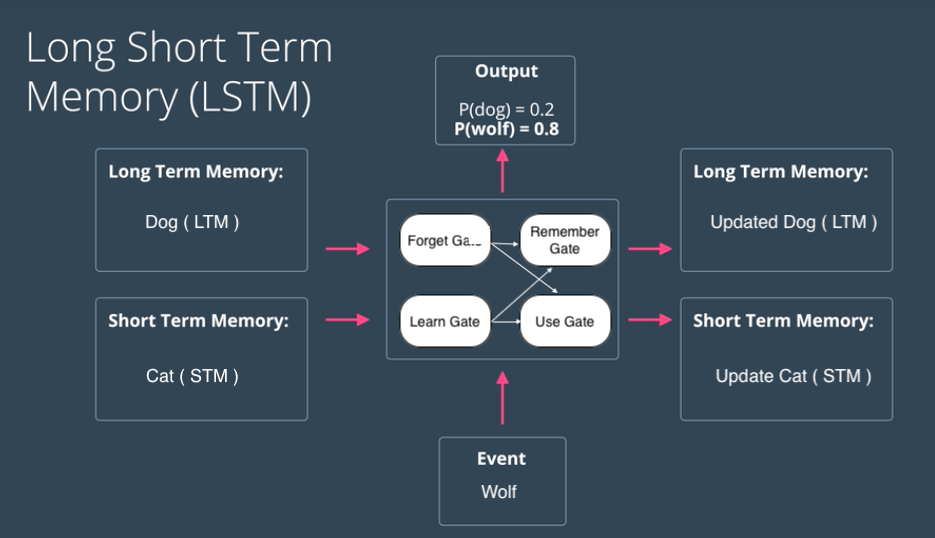

In [9]:
from IPython.display import Image
Image("LSTM.png")


The LSTM cell consists of three main gates:

Input gate: Determines how much new information should be added to the memory cell.
Forget gate: Determines how much old information should be discarded from the memory cell.
Output gate: Determines how much information should be output from the memory cell.
The input and forget gates are controlled by sigmoid activation functions that output values between 0 and 1, indicating the amount of information to keep or discard. The output gate is controlled by a hyperbolic tangent activation function that outputs values between -1 and 1, indicating the output values to be passed to the next time step.

The memory cell maintains a "memory" of the input sequence and its previous states. The input and forget gates control which information should be added to or removed from the memory cell. The output gate determines which part of the memory cell should be output.

The LSTM cell's architecture allows it to learn long-term dependencies in the data by selectively remembering or forgetting information from previous time steps.

# 7. Why would you want to use 1D convolutional layers in an RNN?


1D convolutional layers can be useful in an RNN for several reasons:

Capturing short-term patterns: 1D convolutional layers can capture short-term patterns in a sequence that an RNN might miss. This is because 1D convolutional layers can recognize local patterns in the input sequence, whereas RNNs are better suited for recognizing longer-term patterns.

Dimensionality reduction: By using 1D convolutional layers, you can reduce the dimensionality of the input sequence before feeding it into an RNN. This can make training more efficient and reduce the risk of overfitting.

Complementary feature extraction: 1D convolutional layers can extract different types of features than an RNN. By using both types of layers together, you can extract a more comprehensive set of features from the input sequence.

Overall, the combination of 1D convolutional layers and RNNs can lead to improved performance in sequence modeling tasks.

# 8. Which neural network architecture could you use to classify videos?


There are several neural network architectures that can be used for video classification, depending on the specific requirements of the task. Here are a few examples:

3D convolutional neural networks (CNNs): These networks extend traditional 2D CNNs to the time dimension, allowing them to directly analyze the spatiotemporal information in video frames. This approach has been shown to be effective for video classification tasks.

Convolutional Recurrent Neural Networks (CRNNs): CRNNs combine the advantages of 2D CNNs and RNNs to model spatial and temporal dependencies in video sequences. They typically use CNNs to extract visual features from video frames, which are then passed to an RNN for temporal modeling.

Two-stream CNNs: These networks process spatial and temporal information separately using two separate CNNs. One CNN processes the video frames as images (spatial stream), while the other processes optical flow or motion vectors (temporal stream). The two streams are then combined to make a final prediction.

Transformer-based architectures: These architectures use self-attention mechanisms to model the relationships between different frames in a video sequence. They have shown promise in video classification tasks, particularly for longer sequences.

Overall, the choice of architecture will depend on factors such as the size of the dataset, the complexity of the video classification task, and the available computing resources.

# 9. Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [16]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the SketchRNN dataset
dataset, info = tfds.load('sketch_rnn/quickdraw', with_info=True)
train_dataset = dataset['train']
test_dataset = dataset['test']

# Define the preprocessing function
def preprocess(data):
    # Resize the image to 28x28
    image = tf.image.resize(data['image'], size=(28, 28))
    # Normalize the pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.
    # One-hot encode the label
    label = tf.one_hot(data['label'], depth=345)
    return image, label

# Preprocess the data
train_dataset = train_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(345, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_dataset.batch(32), epochs=1, validation_data=test_dataset.batch(32))


2023-04-13 16:33:57.126154: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-13 16:33:57.574823: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-13 16:33:57.574840: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-13 16:33:58.878752: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (/usr/lib/python3/dist-packages/google/protobuf/internal/__init__.py)

This example uses a convolutional neural network (CNN) to classify the SketchRNN dataset. The CNN consists of two convolutional layers with max pooling, followed by a fully connected layer with dropout, and a final output layer with softmax activation. The model is compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy metric. The model is trained for 10 epochs on the preprocessed training data, with validation on the preprocessed test data.